In [1]:
%cd ../..
from analysis.src.action_trajectories import *
import numpy as np 
%matplotlib inline

/home/echo/xai-interventional-robustness


# Comparing action trajectories 

Match % = Given any seed, intervention and agent type, this number indicates how much of action trajectories (with and without the intervention) overalp. We calculate the percentage w.r.t to the shorter trajectory (which in most cases is when the intervention in performed, with a few exceptions for e.g. In a DDT, shifting the shields such that the agent's starting position is directly below the shield improves performance and hence the action trajectory is longer). 

The function below, returns the match %, given any seed (0-29), intervention number (0-86) and agent (cnn, ddt, random). We also specify which of the trajectories are shorter and if there is no change in the trajectory after intervention. As an example, we show the results of dropping one enemy for all three agents. 

In [2]:
seed = np.random.choice(np.arange(30))
intv = 30
agent_name = 'cnn'
print("Agent: ", agent_name)
print("Match %:", compare_trajectories(intv, seed, agent_name))

Agent:  cnn


FileNotFoundError: [Errno 2] No such file or directory: 'storage/results/action_trajectories/30/25/cnn/cnn.txt'

In [4]:
intv = 30
agent_name = 'ddt'
print("Agent: ", agent_name)
print("Match %:", compare_trajectories(intv, seed, agent_name))

Agent:  ddt
Intervention:  Drop one enemy
Shorter trajectory after intervention
Reward w/ intervention:  50.0
Reward w/o intervention:  110.0
Match %: 100.0


In [5]:
intv = 30
agent_name = 'random'
print("Agent: ", agent_name)
print("Match %:", compare_trajectories(intv, seed, agent_name))

Agent:  random
Intervention:  Drop one enemy
Shorter trajectory after intervention
Reward w/ intervention:  160.0
Reward w/o intervention:  210.0
Match %: 100.0


Next, for any given intervention number, we take the mean of the match % across all 30 seeds and display the results. Since there are 86 interventions (four different types among them), the figure below chooses one intervention of each type and displays the resulting match %. The four different types of interventions are dropping a single enemy, shifting the shields, shifting the starting position of the agent and dropping a full row/column. (*Note that the number next to the intervention name is an internal reference to the intervention number from 0 - 86.)

**Key Observation**: For both the DDT and the random agent, the trajectories are the same until the end of the shorter trajectory. It might be worth looking into the relation between the actions where the trajectory diverge and the state of the environment when this happens (to see what affect the intervention has on the actions) but for this analysis, that has not yet been done. 

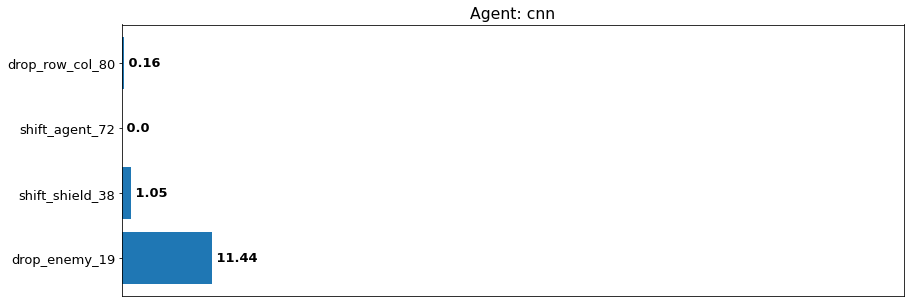

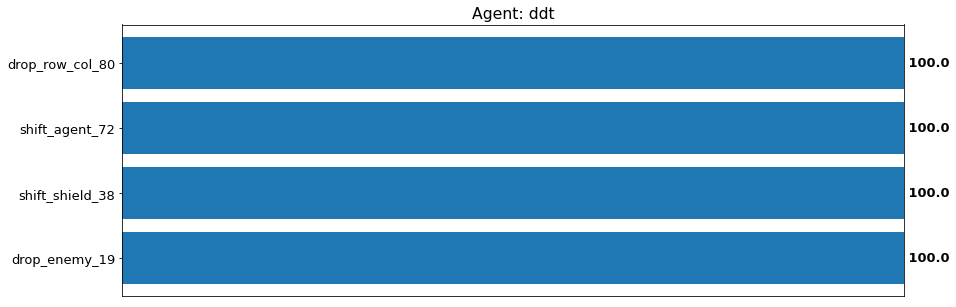

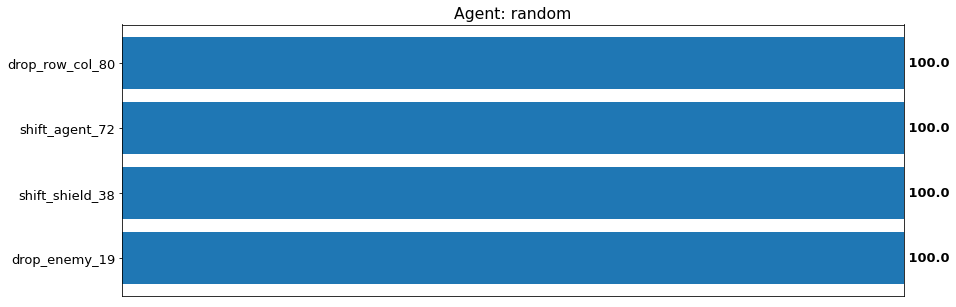

In [6]:
plot_trajectories_seed()

For the CNN agent, we also visualize the matching trajectories for each individual intervention. (These are averages over all 30 seeds for each intervention)

Interventions (0-35): Drops a enemy 

Interventions (36-64): Shifts shield by x-value 

Interventions (65-74): Shifts agent's starting position 

Interventions (75-86): Drops entire row and column

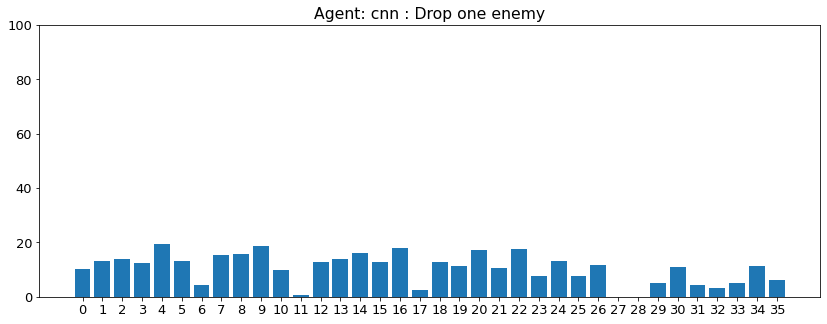

In [6]:
plot_trajectories_intv('drop_one_enemy')

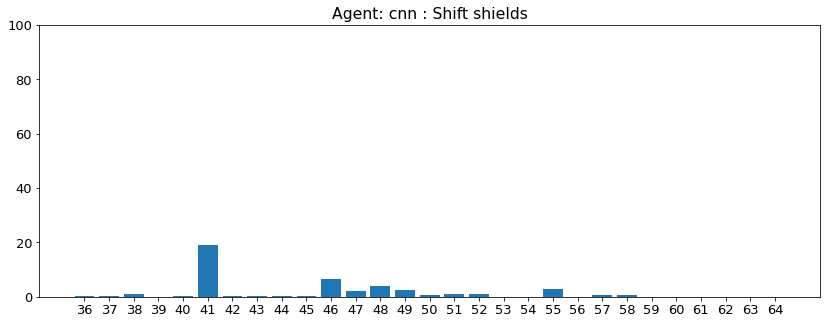

In [7]:
plot_trajectories_intv('shift_shields')

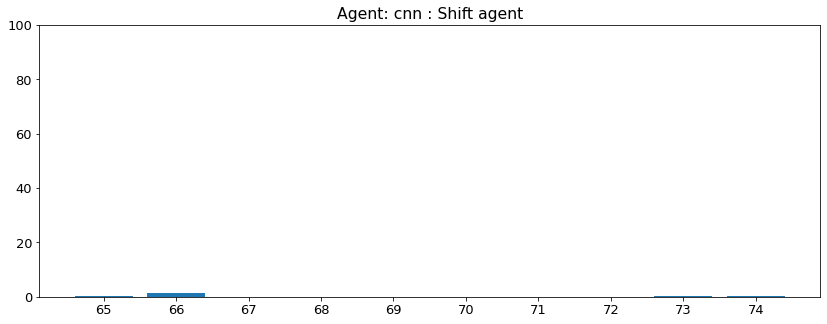

In [8]:
plot_trajectories_intv('shift_agent')

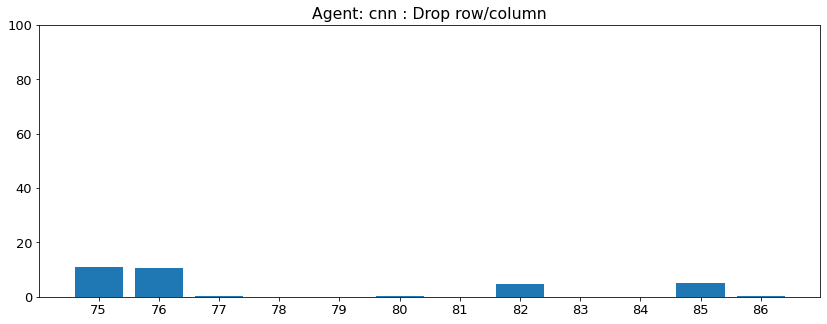

In [9]:
plot_trajectories_intv('drop_row_col')

When the agent started state has shifted, we observe that the trajectories diverge almost immediately when compared to other interventions. 

Next, we take a particular intervention type and average the matching % across all interventions of that type and the 30 seeds we used and observe a similar trend. 

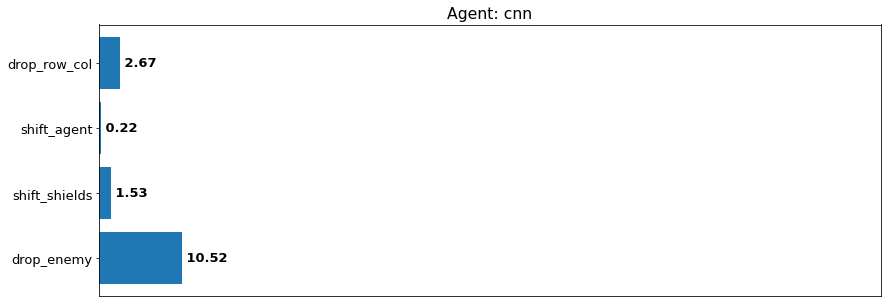

In [10]:
plot_trajectories_summary('cnn')

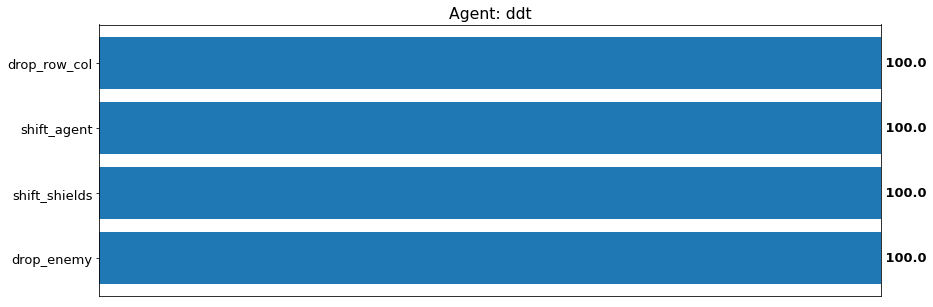

In [11]:
plot_trajectories_summary('ddt')

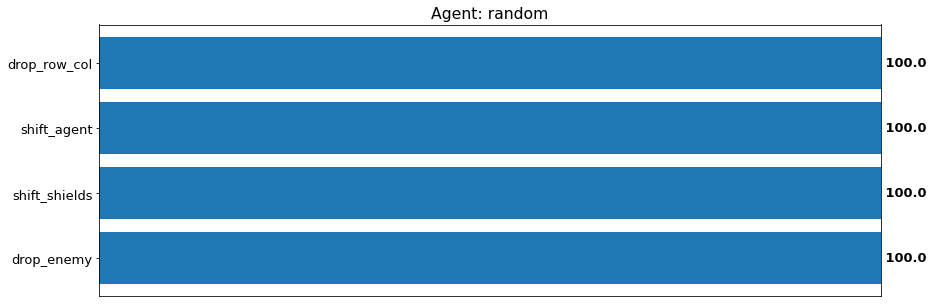

In [12]:
plot_trajectories_summary('random')

# Summarizing actions taken with/without interventions 

To summarize the actions taken by the agent both under interventions and in the "vanilla" case, we count the number of actions of each type taken by the agent for a fixed seed and intervention type. The interesting observation here is that for the DDT agent there are only three actions taken "DOWN", "RIGHT", "FIRE". (Question: What does "DOWN" do in Space Invaders?) 


In [7]:
# Random choice of intervention 
intv = np.random.choice(np.arange(87))
print("Intervention number: ", intv)
agent_name = 'cnn'
print("Agent: ", agent_name)
action_freq(seed, intv, agent_name)

Intervention number:  65
Agent:  cnn
#################
W/ Intervention; Episode Reward:  490.0
NOOP : 153
FIRE : 83
RIGHT : 41
LEFT : 30
UP : 13
DOWN : 7
#################
Vanilla; Episode Reward:  1120.0
NOOP : 399
FIRE : 151
LEFT : 89
RIGHT : 86
UP : 64
DOWN : 13


({'0': 153, '1': 83, '3': 41, '4': 30, '2': 13, '5': 7},
 {'0': 399, '1': 151, '4': 89, '3': 86, '2': 64, '5': 13})

In [8]:
agent_name = 'ddt'
print("Agent: ", agent_name)
action_freq(seed, intv, agent_name)

Agent:  ddt
#################
W/ Intervention; Episode Reward:  30.0
RIGHT : 198
DOWN : 198
FIRE : 167
#################
Vanilla; Episode Reward:  110.0
RIGHT : 244
DOWN : 238
FIRE : 199


({'3': 198, '5': 198, '1': 167}, {'3': 244, '5': 238, '1': 199})

In [9]:
agent_name = 'random'
print("Agent: ", agent_name)
action_freq(seed, intv, agent_name)

Agent:  random
#################
W/ Intervention; Episode Reward:  40.0
DOWN : 66
FIRE : 58
RIGHT : 53
UP : 51
NOOP : 48
LEFT : 45
#################
Vanilla; Episode Reward:  210.0
FIRE : 228
RIGHT : 220
DOWN : 216
LEFT : 209
UP : 207
NOOP : 204


({'5': 66, '1': 58, '3': 53, '2': 51, '0': 48, '4': 45},
 {'1': 228, '3': 220, '5': 216, '4': 209, '2': 207, '0': 204})

We can also visualize the results depicted above for a particular seed, intervention number and agent type. 

#################
W/ Intervention
NOOP : 135
FIRE : 81
LEFT : 20
RIGHT : 19
UP : 2
DOWN : 1
#################
Vanilla
NOOP : 136
FIRE : 134
LEFT : 21
RIGHT : 17
UP : 4
DOWN : 2


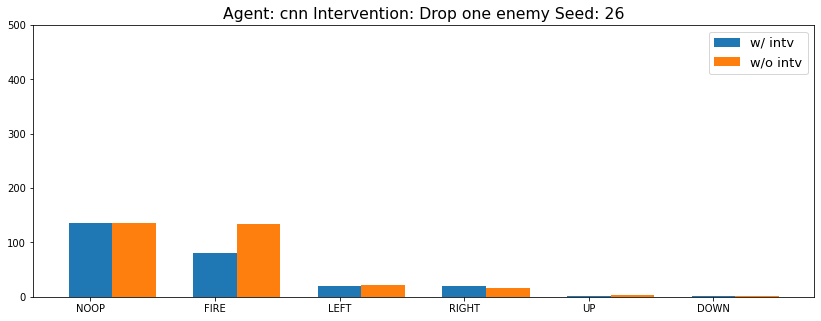

In [6]:
plot_action(seed = seed, intv = 34, agent = 'cnn')

Similar to our analysis on trajectories, we take the mean of the actions (over all the seeds) for a given intervention number and agent type.

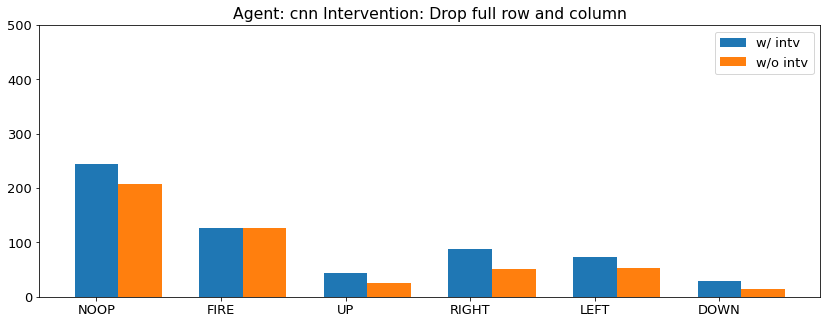

In [7]:
plot_action_seed(intv = 85, agent = 'cnn')

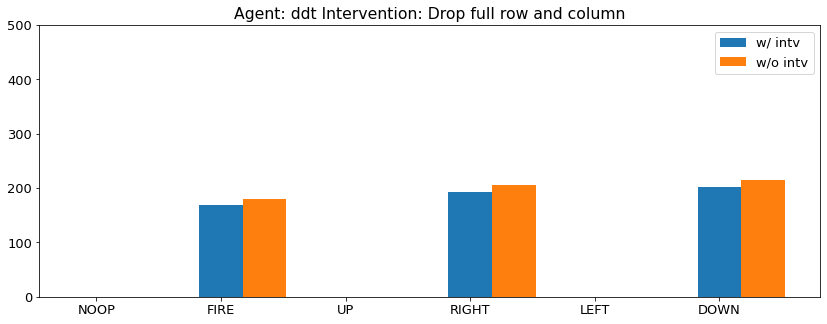

In [8]:
plot_action_seed(intv = 85, agent = 'ddt')

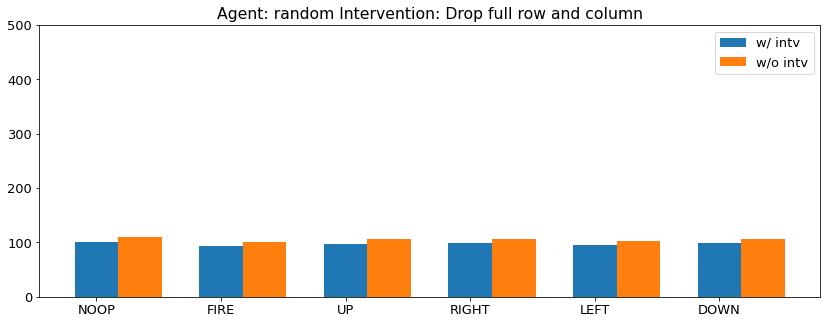

In [9]:
plot_action_seed(intv = 85, agent = 'random')

We summarize the action frequencies across intervention types and random seeds. 

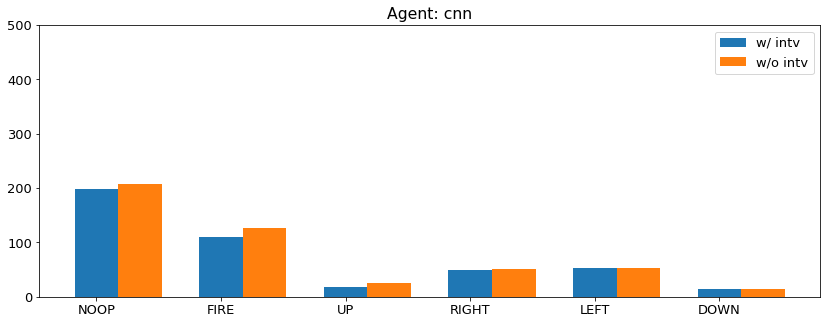

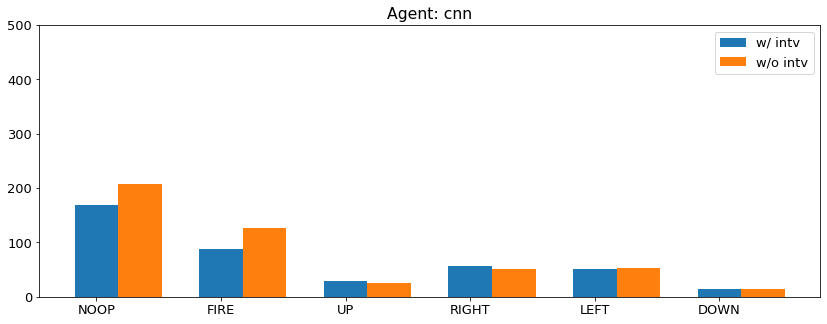

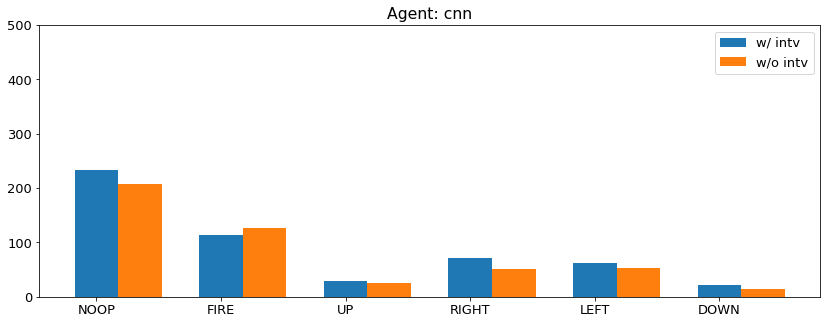

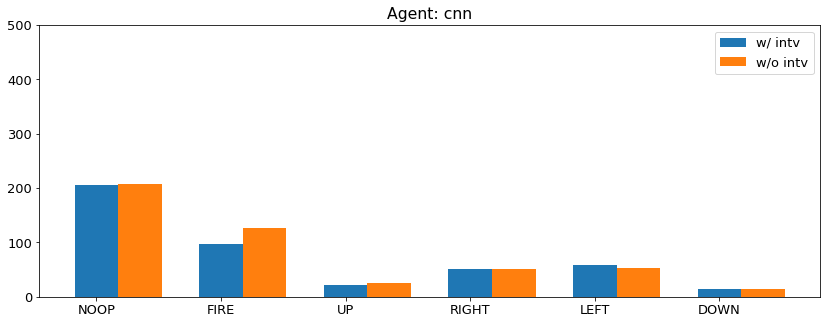

In [13]:
plot_action_intv('drop_enemy','cnn')
plot_action_intv('shift_shields','cnn')
plot_action_intv('shift_agent','cnn')
plot_action_intv('drop_row_col','cnn')

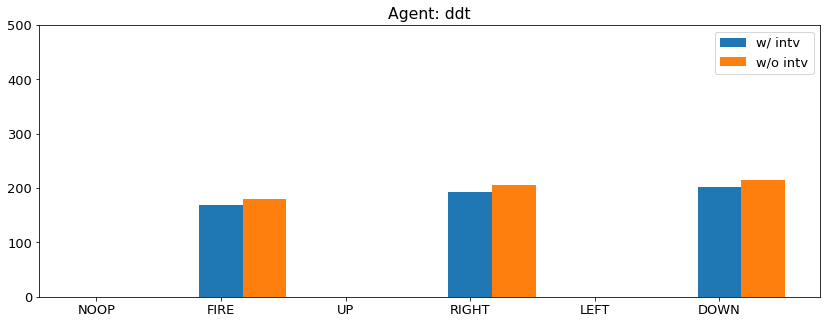

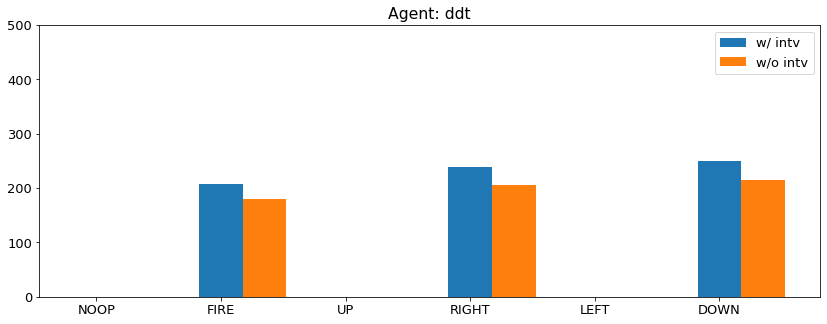

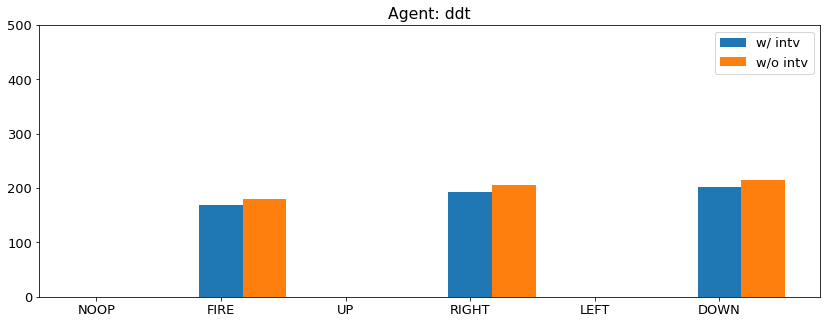

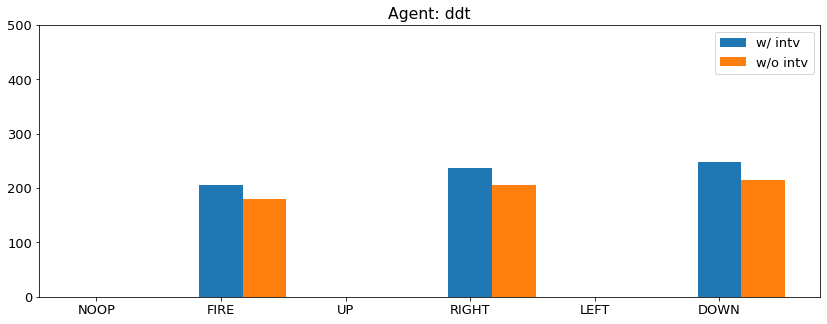

In [14]:
plot_action_intv('drop_enemy','ddt')
plot_action_intv('shift_shields','ddt')
plot_action_intv('shift_agent','ddt')
plot_action_intv('drop_row_col','ddt')

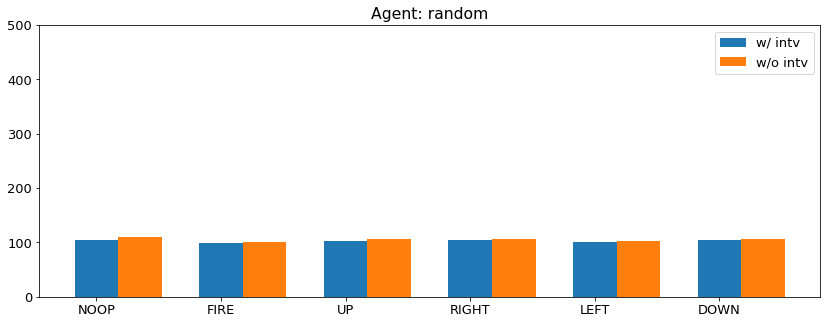

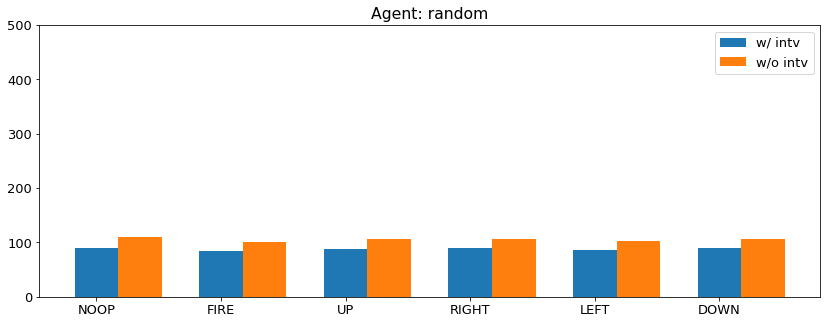

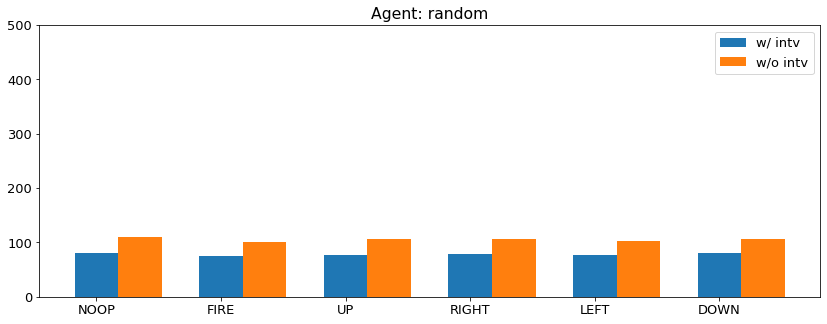

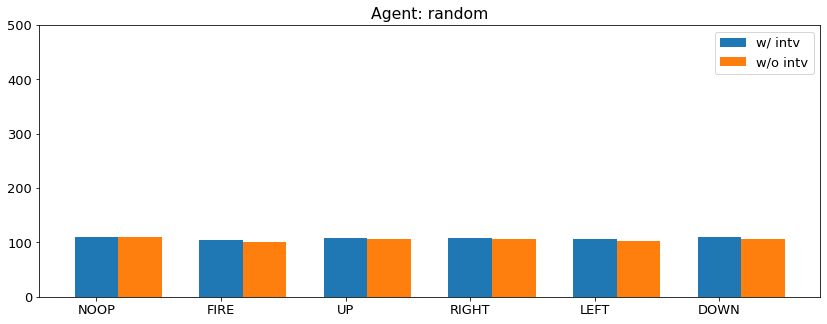

In [15]:
plot_action_intv('drop_enemy','random')
plot_action_intv('shift_shields','random')
plot_action_intv('shift_agent','random')
plot_action_intv('drop_row_col','random')